In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

In [2]:
def scatter_data(x,y):
    for idx, val in enumerate(x):
        if y[idx] == -1:
            plt.scatter(val[0], val[1], marker='o', c = 'blue')
        else:
            plt.scatter(val[0], val[1], marker='o', c='red')

In [3]:
def svm_function(x,y):
    #initilizing weight
    w = np.zeros(len(x[0]))
    g = np.ones(len(x))
    #initialize learning rate
    l_rate = 1
    C = 10
    N = len(y)
    #epoch
    epoch = 1000
    #output list
    out = []
    lamb = 2 / (C * N)
    #training svm
    for e in range(epoch):
        for i, val in enumerate(x):
            val1 = np.dot(x[i], w)
            if (y[i]*val1 < 1):
                w = w - l_rate * (lamb*w - y[i]*x[i])
                g += lamb * y[i]
            else:
                w = w - l_rate * lamb*w
    
    for i, val in enumerate(x):
        out.append(np.dot(x[i], w))
    
    return w, out, y*g

In [4]:
def _compute_intercept(alpha, yg):
    indices = (alpha < 1000) * (alpha > 0)
    return np.mean(yg[indices])

In [5]:
# generate 2d classification dataset
x, y = make_blobs(n_samples=100, centers=2, n_features=2)
y[y == 0] = -1
# b = np.array([[-1] * len(x)]).T
# x = np.append(x, b, axis=1)
# print(x)
# print(y)

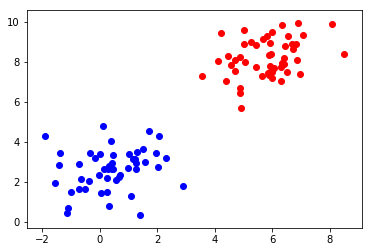

In [6]:
scatter_data(x,y)

In [7]:
w, out, yg = svm_function(x,y)
print('Calculated weights')
print(w)

Calculated weights
[18.63522972 -7.2499886 ]


In [8]:
# b = _compute_intercept(np.array(out),yg)
# print(b)

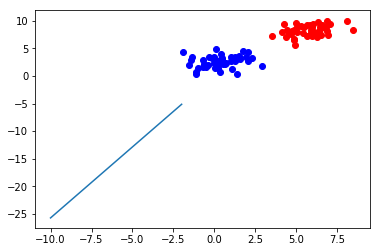

In [9]:
scatter_data(x,y)
a = -w[0]/w[1]
xx = np.linspace(-10, -2)
yy = a * xx  #+ b
plt.plot(xx,yy)
plt.show()